In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
import numpy as np

In [21]:
xs = np.arange(-5,5,0.25)

In [22]:
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [23]:
ys = np.tanh(xs)

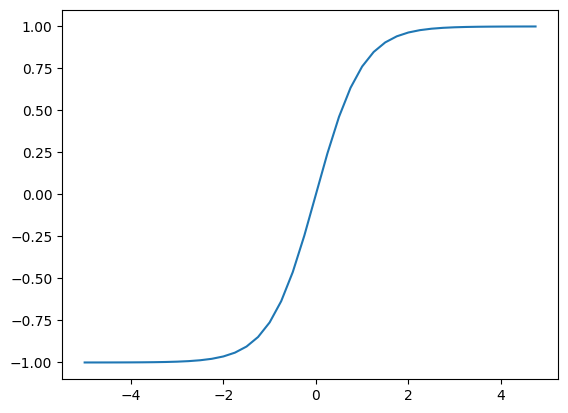

In [24]:
plt.plot(xs,ys)

## Tanh almost always superior

- Since it is around -1 and 1, it is centered around 0 which is better.
- Except for the last layer since we want to convert to probabilities.

In [25]:
def sigmoid(x):
    return 1 / (1+ np.exp(-x))

In [26]:
ys = sigmoid(xs)

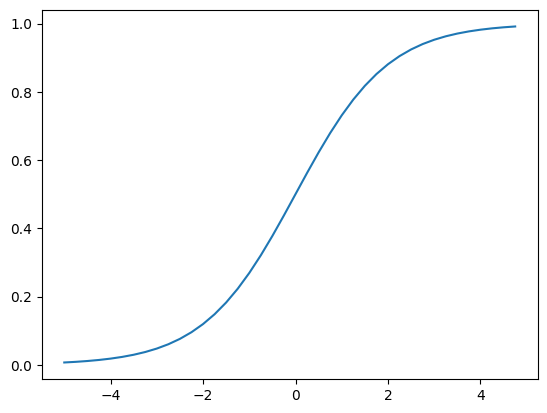

In [27]:
plt.plot(xs,ys)

## Problem

- Both `tanh` and $\sigma$ (sigmoid) have veeery close to zero derivative for most values. 
- This causes gradients to _vanish_ : close to zero : slow down gradient descent.

Solution:

ReLU: Actually the derivative at point exactly 0 is not well-defined. But this is not a problem since we can just choose one side or the other (round up to either positive or negative side).


- Use sigmoid for the last layers, (never use this otherwise since tanh is superior)
- Use ReLU or Leaky ReLU for all the intermediate layers.



In [37]:
def relu(x):
    return x * (x>0)

In [38]:
ys = relu(xs)

In [39]:
ys

array([-0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  ,
       -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  ,
       -0.  , -0.  ,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

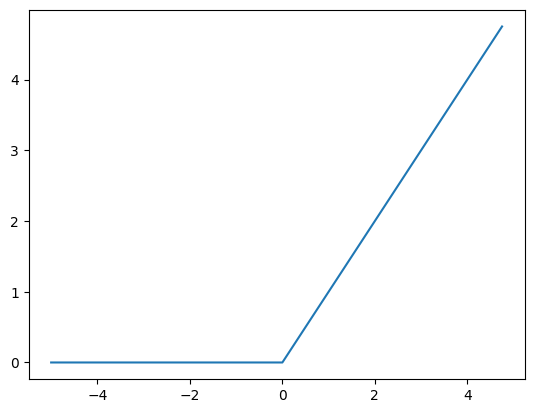

In [40]:
plt.plot(xs,ys)

In [45]:
def leakyRelu(x,coeff=0.1):
    return np.maximum(coeff*x , x)

In [46]:
ys = leakyRelu(xs)

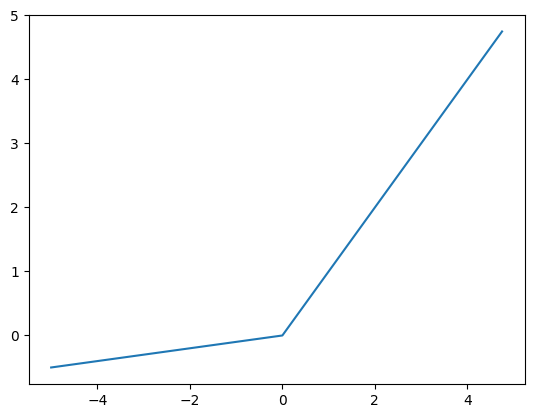

In [47]:
plt.plot(xs,ys)

# Why non-linearity is needed?? 

What happens when we remove the activation functions? 

- We basically get linear combination of the input features
- Twice matrix multiplication simply is multiplication by another matrix.
- Linear hidden layer is basically useless since it is still another linear.
- If your problem is regression such as house price prediction, we can use linear or Relu at the last layer. 
    - So that we can output something large value (or only positive and unbounded for relu)

# Derivatives of the Activation Functions


Case 1: $\sigma$ (sigmoid)

$$
a = g(z) = \dfrac{1}{1+e^{-z}} \\
\dfrac{dg(z)}{dz} = g(z) (1- g(z)) = a (1-a)
$$


Case 2: $\tanh$

$$
a = g(z) = \tanh(z) \\
\dfrac{d g(z)}{z} = 1 - (\tanh(z))^{2} = 1 - a^{2}
$$